In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('6_class_bbbp.csv', sep=';')
# Display top of dataframe
data.head()

,SMILES,p_np_class
0,[Cl].CC(C)NCC(O)COC1=C2C=CC=CC2=CC=C1,yes
1,CC(C)(C)OC(=O)CCCC1=CC=C(C=C1)N(CCCl)CCCl,yes
2,CC1COC2=C(N3CCN(C)CC3)C(F)=CC3=C2N1C=C(C(O)=O)...,yes
3,CC(=O)NCCCOC1=CC(CN2CCCCC2)=CC=C1,yes
4,CC1=C(C(=O)N[C@H]2[C@H]3SC(C)(C)[C@@H](N3C2=O)...,yes


In [3]:
data1 = pd.read_csv('data2_col.csv')
# Display top of dataframe
data1.head()

,MW,AMW,nTB,nP,nStructures,totalcharge,SpMax_X,C-023,H-055,O-063,...,F10[I-I],F10[I-B],F10[I-Si],F10[I-X],F10[B-B],F10[B-Si],F10[B-X],F10[Si-Si],F10[Si-X],F10[X-X]
0,259.4,6.484,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360.4,7.207,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,361.4,7.857,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,290.5,6.180,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,435.9,9.275,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X=data1
X

,MW,AMW,nTB,nP,nStructures,totalcharge,SpMax_X,C-023,H-055,O-063,...,F10[I-I],F10[I-B],F10[I-Si],F10[I-X],F10[B-B],F10[B-Si],F10[B-X],F10[Si-Si],F10[Si-X],F10[X-X]
0,259.4,6.484,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360.4,7.207,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,361.4,7.857,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,290.5,6.180,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,435.9,9.275,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,276.0,13.800,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,399.5,7.990,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,323.4,7.521,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,382.5,7.083,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = data['p_np_class'].astype('category').cat.codes
y

0       1
1       1
2       1
3       1
4       1
       ..
1987    1
1988    1
1989    1
1990    1
1991    1
Length: 1992, dtype: int8

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
#     y = x['score']
#     x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
#     x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
#                           'Water Use (All Water Sources) (kgal)',
#                           'log_Water Use (All Water Sources) (kgal)',
#                           'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
#     x['score'] = y
               
    return x

In [ ]:
# Remove the collinear features above a specified correlation coefficient
X = remove_collinear_features(X, 0.9);
X.shape

In [7]:
def getFeature(mask):
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)
            
    return new_features

In [8]:
def myModel(myX,myY,X_test,y_test):
    # instantiate the model (using the default parameters)
    reg = LinearRegression().fit(myX, myY)
    y_pred = reg.predict(X_test)
   
    return reg.score(X_test,y_test)

### 1. Chi-square

In [11]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X_norm, y)
chi_features = getFeature(chi_selector.get_support())
chi_features

['MW', 'AMW', 'nTB', 'nP', 'totalcharge', 'F10[X-X]']

In [12]:
X_chi = X[chi_features]
X_chi

,MW,AMW,nTB,nP,totalcharge,F10[X-X]
0,259.4,6.484,0.0,0.0,0.0,0.0
1,360.4,7.207,0.0,0.0,0.0,0.0
2,361.4,7.857,0.0,0.0,0.0,0.0
3,290.5,6.180,0.0,0.0,0.0,0.0
4,435.9,9.275,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1987,276.0,13.800,0.0,0.0,0.0,0.0
1988,399.5,7.990,0.0,0.0,1.0,0.0
1989,323.4,7.521,0.0,0.0,1.0,0.0
1990,382.5,7.083,0.0,0.0,0.0,0.0


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_chi,y,test_size=0.25,random_state=0)
xi_score = myModel(X_train,y_train,X_test,y_test)
xi_score

0.11199397661886701

### 2. Mutual Information

In [14]:
from sklearn.feature_selection import mutual_info_classif
mi_selector = SelectKBest(mutual_info_classif, k=6)
mi_selector.fit(X, y)
mi_feature = getFeature(mi_selector.get_support())
mi_feature

['MW', 'AMW', 'P-119', 'B01[Br-I]', 'B08[O-I]', 'F04[Br-B]']

In [15]:
X_mi = X[mi_feature]
X_train,X_test,y_train,y_test=train_test_split(X_mi,y,test_size=0.25,random_state=0)
mi_score = myModel(X_train,y_train,X_test,y_test)
mi_score

0.10264195432302081

### 3. Anova F-value

In [16]:
#3 Anova F-value
from sklearn.feature_selection import f_classif
anov_selector = SelectKBest(f_classif, k=6)
anov_selector.fit(X, y)
anova_feature = getFeature(anov_selector.get_support())
anova_feature

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   4    6    7 ... 1093 1094 1095] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['MW', 'AMW', 'nTB', 'nP', 'totalcharge', 'F10[X-X]']

In [17]:
X_anova = X[anova_feature]
X_train,X_test,y_train,y_test=train_test_split(X_anova,y,test_size=0.25,random_state=0)
anova_score = myModel(X_train,y_train,X_test,y_test)
anova_score

0.11199397661886701

### 4. Variance Threshold

In [21]:
#4 Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=0)
var_selector.fit_transform(X)
var_feature = getFeature(var_selector.get_support())
len(var_feature)

5

In [23]:
var_feature

['MW', 'AMW', 'nTB', 'nP', 'totalcharge']

In [22]:
X_thresh = X[var_feature]
X_train,X_test,y_train,y_test=train_test_split(X_thresh,y,test_size=0.25,random_state=0)
vt_score = myModel(X_train,y_train,X_test,y_test)
vt_score

0.11199397661886701

### 5. Fisher Score

In [24]:
#5. Fisher Score
from skfeature.function.similarity_based import fisher_score
score = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
X.columns[score[:6]]

Index(['F10[X-X]', 'F10[Si-X]', 'F10[B-B]', 'F10[Si-Si]', 'F10[B-X]',
       'F03[N-Si]'],
      dtype='object')

In [25]:
X_fisher = X[X.columns[score[:6]]]
X_train,X_test,y_train,y_test=train_test_split(X_fisher,y,test_size=0.25,random_state=0)
fsh_score = myModel(X_train,y_train,X_test,y_test)
fsh_score

-0.00024925659221342045

### 6. MultiSURF

In [26]:
#6. MultiSURF
from skrebate import MultiSURF
fs = MultiSURF(n_jobs=-1, n_features_to_select=X.columns)
fs.fit(X.values, y.values)
fs

MultiSURF(n_features_to_select=Index(['MW', 'AMW', 'nTB', 'nP', 'nStructures', 'totalcharge', 'SpMax_X',
       'C-023', 'H-055', 'O-063',
       ...
       'F10[I-I]', 'F10[I-B]', 'F10[I-Si]', 'F10[I-X]', 'F10[B-B]',
       'F10[B-Si]', 'F10[B-X]', 'F10[Si-Si]', 'F10[Si-X]', 'F10[X-X]'],
      dtype='object', length=1096),
          n_jobs=-1)

In [27]:
X_multi = X[X.columns]
X_train,X_test,y_train,y_test=train_test_split(X_multi,y,test_size=0.25,random_state=0)
ms_score = myModel(X_train,y_train,X_test,y_test)
ms_score

0.11199397661886701

### 7. Recursive Feature Elimination

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LinearRegression(), 
                   n_features_to_select=6, step=1, verbose=-1)
rfe_selector.fit(X_norm, y)
rfe_feature = getFeature(rfe_selector.get_support())
rfe_feature

['MW', 'AMW', 'nTB', 'nP', 'totalcharge', 'F10[X-X]']

In [29]:
X_rec = X[rfe_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rec,y,test_size=0.25,random_state=0)
rfe_score = myModel(X_train,y_train,X_test,y_test)
rfe_score

0.11199397661886701

### 8. Permutation Importance

In [30]:
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
perm = PermutationImportance(LinearRegression(), random_state=42, cv=10)
perm.fit(X, y)
perm_selector = SelectFromModel(perm,max_features=6).fit(X, y)
perm_feature = getFeature(perm_selector.get_support())
perm_feature

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classifier=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classifier=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


['MW', 'AMW', 'nTB']

In [31]:
X_perm = X[perm_feature]
X_train,X_test,y_train,y_test=train_test_split(X_perm,y,test_size=0.25,random_state=0)
pi_score = myModel(X_train,y_train,X_test,y_test)
pi_score

0.1047861456810808

### 9. SHAP

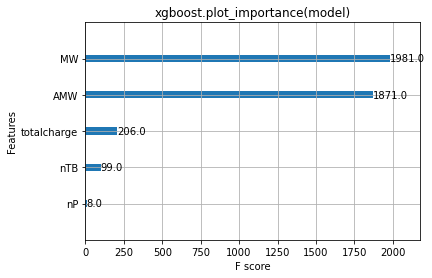

In [34]:
import shap
import xgboost
import matplotlib.pylab as pl
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]



model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, y), 100)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [35]:
X_shap = X[['MW', 'AMW', 'totalcharge', 'nTB', 'nP']]
X_train,X_test,y_train,y_test=train_test_split(X_shap,y,test_size=0.25,random_state=0)
shap_score = myModel(X_train,y_train,X_test,y_test)
shap_score

0.11199397661886701

### 10. Boruta

In [36]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=6)
boru_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
boru_selector.fit(X.values, y.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=33, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1FE1522E040),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1FE1522E040)

In [37]:
accept = X.columns[boru_selector.support_].to_list()
#accept

In [43]:
accept

['MW', 'AMW']

In [38]:
X_boruta = X[accept]
X_train,X_test,y_train,y_test=train_test_split(X_boruta,y,test_size=0.25,random_state=0)
boruta_score = myModel(X_train,y_train,X_test,y_test)
boruta_score

0.10264195432302081

### 11. Embedded Random Forest

In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=6)
embeded_rf_selector.fit(X, y)
embeded_rf_feature = getFeature(embeded_rf_selector.get_support())
embeded_rf_feature

['MW', 'AMW', 'nTB', 'nP', 'totalcharge']

In [40]:
X_rf = X[embeded_rf_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rf,y,test_size=0.25,random_state=0)
erf_score = myModel(X_train,y_train,X_test,y_test)
erf_score

0.11199397661886701

### 12. Embedded LightGBM

In [41]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=6)
embeded_lgb_selector.fit(X, y)
embeded_lgb_feature = getFeature(embeded_lgb_selector.get_support())
embeded_lgb_feature

['MW', 'AMW']

In [42]:
X_lgbm = X[embeded_lgb_feature]
X_train,X_test,y_train,y_test=train_test_split(X_lgbm,y,test_size=0.25,random_state=0)
elg_score = myModel(X_train,y_train,X_test,y_test)
elg_score

0.10264195432302081

In [44]:
chi_table = ['Chi-square', float("{:.4f}".format(xi_score)), 'MW', 'AMW', 'nTB', 'nP', 'totalcharge', 'F10[X-X]' ]
mi_table = ['Mutual Information',float("{:.4f}".format(mi_score)) , 'MW', 'AMW', 'P-119', 'B01[Br-I]', 'B08[O-I]', 'F04[Br-B]']
anova_table = ['Anova F-value', float("{:.4f}".format(anova_score)), 'MW', 'AMW', 'nTB', 'nP', 'totalcharge', 'F10[X-X]']
var_table = ['Variance Threshold',float("{:.4f}".format(vt_score)),'MW', 'AMW', 'nTB', 'nP', 'totalcharge','-']
fisher_table = ['Fisher Score', float("{:.4f}".format(fsh_score)), 'F10[X-X]', 'F10[Si-X]', 'F10[B-B]', 'F10[Si-Si]', 'F10[B-X]','F03[N-Si]']
multi_table = ['MultiSURF',float("{:.4f}".format(ms_score)),'-','-','-','-','-','-']
rec_table = ['Recursive Feature Elimination',float("{:.4f}".format(rfe_score)), 'MW', 'AMW', 'nTB', 'nP', 'totalcharge', 'F10[X-X]']
perm_table = ['Permutation Importance',float("{:.4f}".format(pi_score)),'MW', 'AMW', 'nTB', '-', '-', '-']
shap_table = ['SHAP', float("{:.4f}".format(shap_score)), 'MW', 'AMW', 'totalcharge', 'nTB', 'nP', '-']
boruta_table = ['Boruta',float("{:.4f}".format(boruta_score)),'MW', 'AMW','-','-','-','-']
rf_table = ['Embedded Random Forest',float("{:.4f}".format(erf_score)) ,'MW', 'AMW', 'nTB', 'nP', 'totalcharge','-']
lgbm_table =['Embedded LightGBM', float("{:.4f}".format(elg_score)), 'MW', 'AMW','-','-','-','-']

In [45]:
myTable = [chi_table, mi_table, anova_table,var_table, fisher_table, multi_table, rec_table, perm_table, shap_table,
          boruta_table, rf_table, lgbm_table]

In [46]:
results = pd.DataFrame(myTable,columns=['Method', 'R^2 score','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'])

results   

,Method,R^2 score,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.1120,MW,AMW,nTB,nP,totalcharge,F10[X-X]
1,Mutual Information,0.1026,MW,AMW,P-119,B01[Br-I],B08[O-I],F04[Br-B]
2,Anova F-value,0.1120,MW,AMW,nTB,nP,totalcharge,F10[X-X]
3,Variance Threshold,0.1120,MW,AMW,nTB,nP,totalcharge,-
4,Fisher Score,-0.0002,F10[X-X],F10[Si-X],F10[B-B],F10[Si-Si],F10[B-X],F03[N-Si]
5,MultiSURF,0.1120,-,-,-,-,-,-
6,Recursive Feature Elimination,0.1120,MW,AMW,nTB,nP,totalcharge,F10[X-X]
7,Permutation Importance,0.1048,MW,AMW,nTB,-,-,-
8,SHAP,0.1120,MW,AMW,totalcharge,nTB,nP,-
9,Boruta,0.1026,MW,AMW,-,-,-,-


In [47]:
results.to_csv('result2_linear.csv')